In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import random
import train
from model import NNModel, NNModelEx, CNNModel

pd.set_option('display.max_columns', 999)

In [2]:
configurations = {
    'dataset' : 't2/', # '', 'sample_', 'secret_'
    'model_identifier' : "tc2_0",
    'model_path' : f"./models",
    'model': NNModelEx,
    'device' : 'cpu',
    'random_seed' : 0,
    'lr' : 3e-3,
    'weight_decay' : 0.3, #Adam
    'max_epochs' : 50000,
    'do_validate' : True,
    'model_definition' : [
        ('l', (500,)), ('r', (True,)),
        ('l', (500,)), ('r', (True,)),
        ('l', (500,)), ('r', (True,)),
        ('l', (500,)), ('r', (True,)),
        ('l', (500,)), ('r', (True,)),
    ],
    'train_params' : {
        'batch_size': 10000,
        'shuffle': True,
        'num_workers': 3,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 200000,
        'num_workers': 1,
        'pin_memory': True,
    },
}

Loading existing model


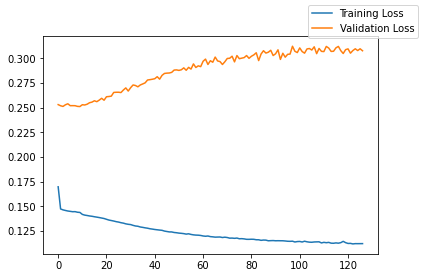

In [3]:
model, _, _, mean_losses, _ = train.load_model_with_config(configurations)

tl, vl = zip(*mean_losses)

fig,ax = plt.subplots()
ax.plot(tl, label="Training Loss")
ax.plot(vl, label="Validation Loss")

fig.legend()
plt.show()

In [4]:
import torch
torch.save(model.state_dict(), 't2_nn.pth')

In [5]:
model


NNModelEx(
  (net): Sequential(
    (0): Linear(in_features=72, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): Linear(in_features=500, out_features=500, bias=True)
    (9): ReLU()
    (10): Linear(in_features=500, out_features=1, bias=True)
  )
)